In [108]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os

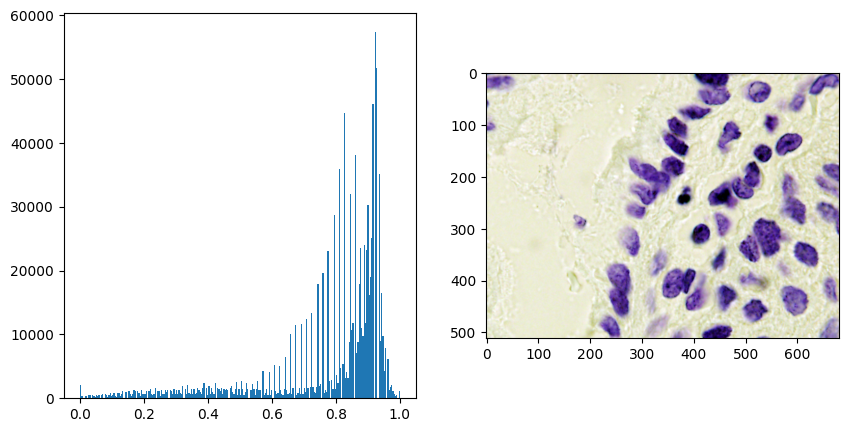

In [105]:
def plt_img_hist(img_path):
    img_arr = plt.imread(img_path)
    counts, bins = np.histogram(img_arr, bins=256, range=(0,1))
    fig, axes = plt.subplots(1,2, figsize=(10,5))
    # axes[0].plot(bins[:-1], counts)
    # axes[0].stairs(counts, bins)
    axes[0].hist(bins[:-1], bins, weights=counts)
    axes[1].imshow(img_arr)
    plt.show()    

plt_img_hist("few/imgs/44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078.png")

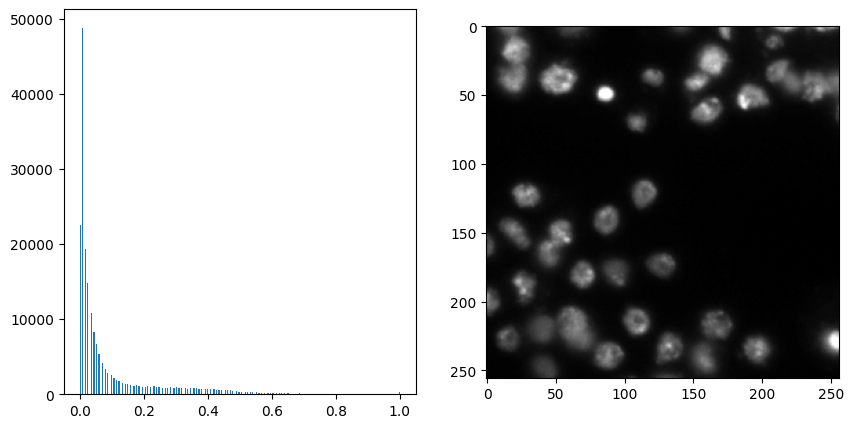

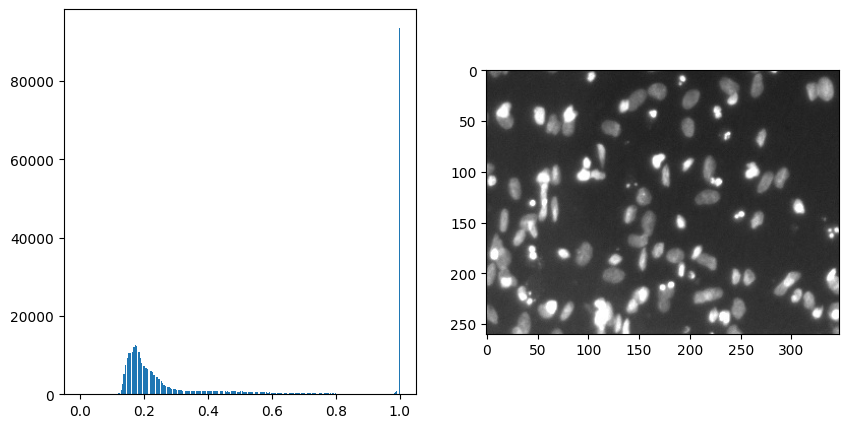

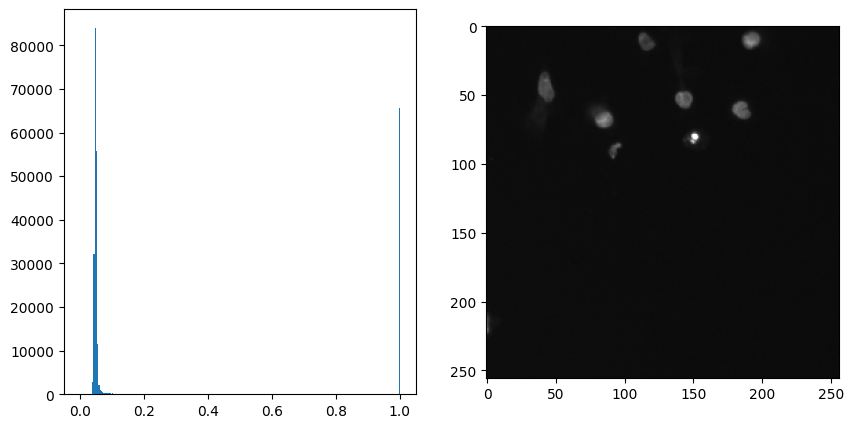

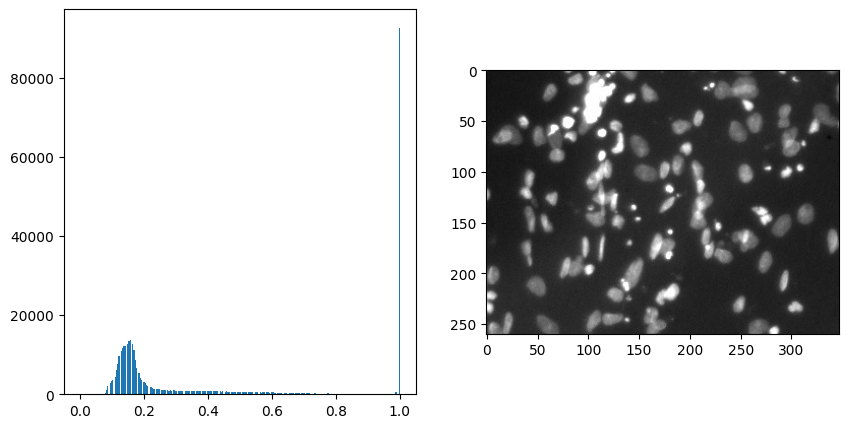

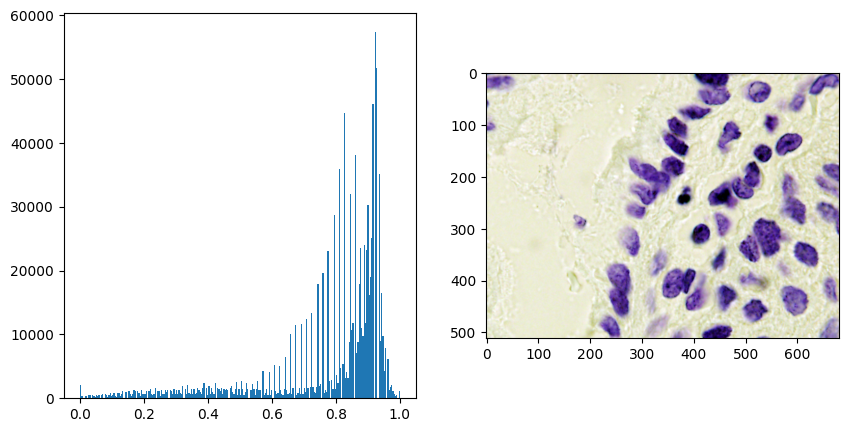

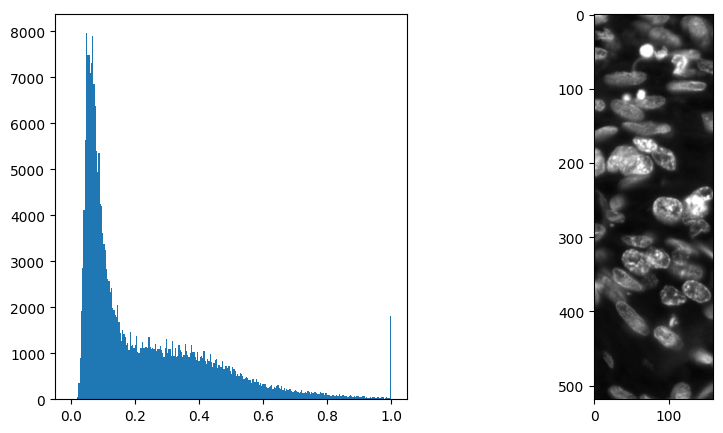

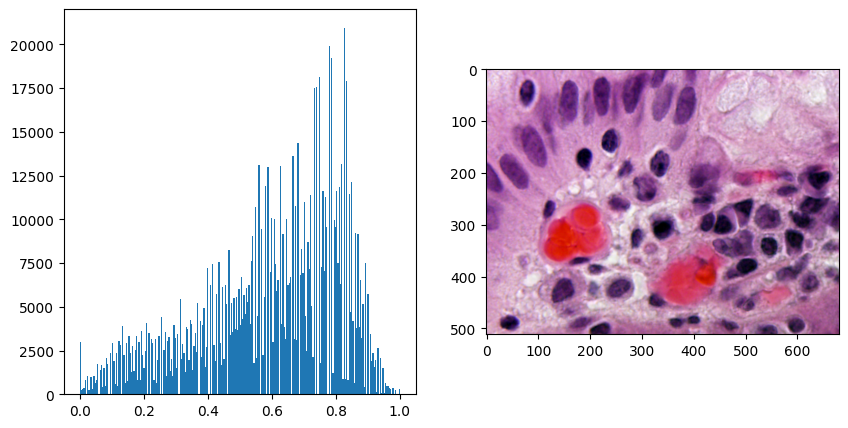

In [116]:
for img_id in os.listdir("few/imgs"):
    if not img_id.endswith(".png"): continue
    img_path = os.path.join("few/imgs", img_id)
    plt_img_hist(img_path)